### MSCS 634 - Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering
**Student Name:** Muluwork Geremew

**Course Title:** MSCS 634 -  Advanced Big Data and Data Mining (MSCS-634-M40).  


In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y  # optional, used for visualization only

# Explore the dataset
print("📐 Shape of dataset:", df.shape)
print("\n🔍 First 5 rows:\n", df.head())
print("\nℹ️ Info:\n")
df.info()
print("\n📊 Statistical Summary:\n", df.describe())

# Standardize features (excluding target)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))


📐 Shape of dataset: (178, 14)

🔍 First 5 rows:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315

In [3]:
print("null values in the dataset:\n", df.isnull().sum())

null values in the dataset:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


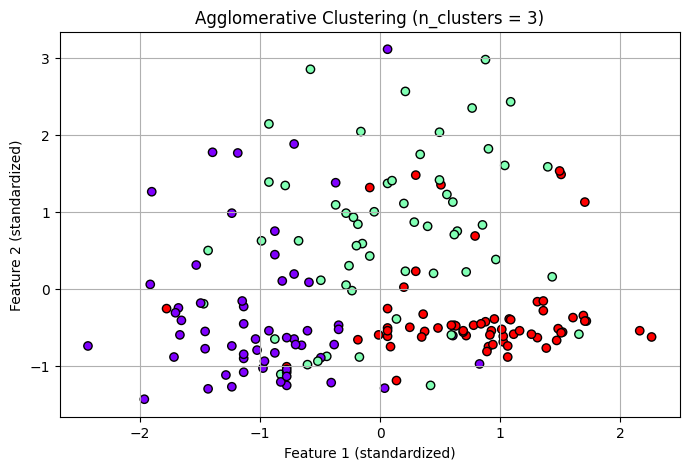

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Apply Agglomerative Clustering (try n_clusters = 3)
# Agglomerative clustering is a hierarchical clustering method that builds nested clusters by merging smaller clusters into larger ones.
# Here, we will use AgglomerativeClustering from sklearn with n_clusters set to 3.
# The dataset is first standardized using StandardScaler to ensure that all features contribute equally to the distance calculations.
# The clustering results are then visualized using a scatter plot of the first two features.
# Note: Agglomerative clustering is sensitive to the scale of the data, hence standardization is crucial.
agg_clust = AgglomerativeClustering(n_clusters=3)
labels_agg = agg_clust.fit_predict(X_scaled)

# Step 2: Visualize clusters (using first 2 features for scatter plot)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='rainbow', edgecolor='k')
plt.title("Agglomerative Clustering (n_clusters = 3)")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.grid(True)
plt.show()


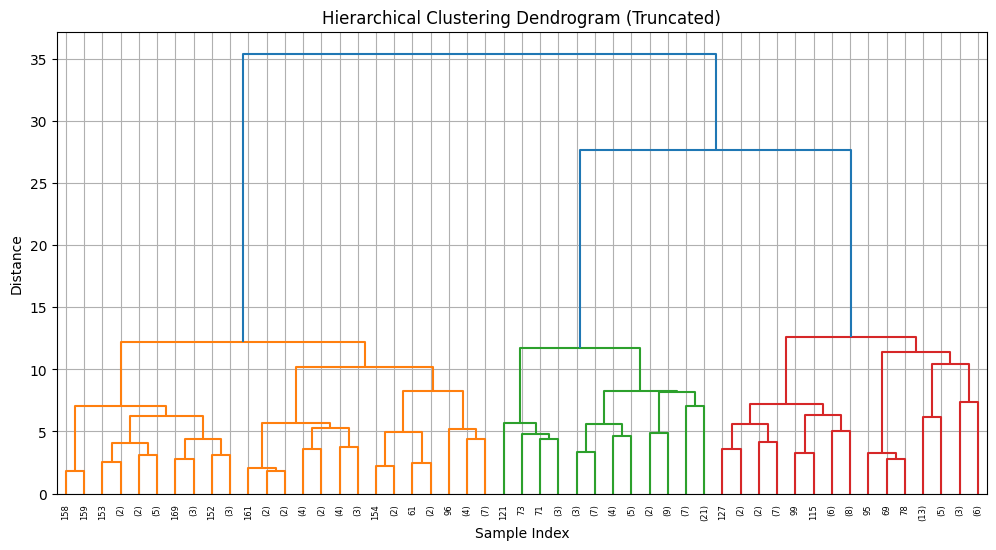

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Generate linkage matrix
# The linkage matrix is used to create the dendrogram, which visualizes the hierarchical clustering.
# Here, we use the 'ward' method, which minimizes the variance of clusters being merged.
# The linkage matrix is computed on the standardized data.  
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


## Step 2: Hierarchical Clustering

### Method Used:
We applied **Agglomerative Hierarchical Clustering** using the standardized features of the Wine dataset.

### Key Actions:
- Clustering was performed with `n_clusters = 3`.
- A scatter plot visualized clusters using the first two principal features.
- A **dendrogram** was generated to illustrate hierarchical merging of samples.

### Observations:
- The clusters formed with `n_clusters = 3` show clear separation in 2D space, though some overlap exists.
- The dendrogram supports the choice of 3 clusters, with a major vertical cut-off point visible at height ~25.
- Hierarchical clustering is intuitive and doesn't require predefining a specific shape, but it can become computationally expensive with larger datasets.

### Next Step:
Apply **DBSCAN Clustering** and evaluate its sensitivity to `eps` and `min_samples`, as well as its ability to detect noise.


In [9]:
# Step 3: Evaluate clustering performance
# Exclude noise (-1) for metrics
eps_values = [0.5, 0.8, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps: {eps}, min_samples: {min_s} --> Clusters: {n_clusters}, Noise Points: {n_noise}")


eps: 0.5, min_samples: 3 --> Clusters: 0, Noise Points: 178
eps: 0.5, min_samples: 5 --> Clusters: 0, Noise Points: 178
eps: 0.5, min_samples: 7 --> Clusters: 0, Noise Points: 178
eps: 0.8, min_samples: 3 --> Clusters: 0, Noise Points: 178
eps: 0.8, min_samples: 5 --> Clusters: 0, Noise Points: 178
eps: 0.8, min_samples: 7 --> Clusters: 0, Noise Points: 178
eps: 1.0, min_samples: 3 --> Clusters: 0, Noise Points: 178
eps: 1.0, min_samples: 5 --> Clusters: 0, Noise Points: 178
eps: 1.0, min_samples: 7 --> Clusters: 0, Noise Points: 178
eps: 1.2, min_samples: 3 --> Clusters: 0, Noise Points: 178
eps: 1.2, min_samples: 5 --> Clusters: 0, Noise Points: 178
eps: 1.2, min_samples: 7 --> Clusters: 0, Noise Points: 178
eps: 1.5, min_samples: 3 --> Clusters: 8, Noise Points: 147
eps: 1.5, min_samples: 5 --> Clusters: 0, Noise Points: 178
eps: 1.5, min_samples: 7 --> Clusters: 0, Noise Points: 178


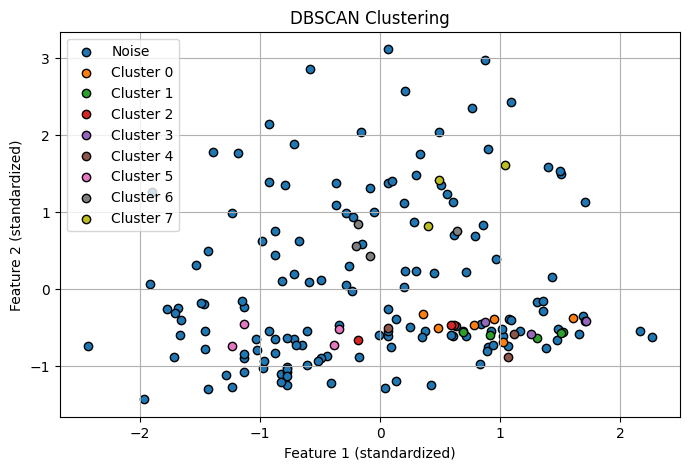

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Apply DBSCAN
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions.
# Here, we will use DBSCAN with eps set to 1.2 and min_samples set to 5.
# The dataset is first standardized using StandardScaler to ensure that all features contribute equally to the distance calculations.
# The clustering results are then visualized using a scatter plot of the first two features.
# Note: DBSCAN does not require the number of clusters to be specified beforehand, but it does require two parameters: eps (the maximum distance between two samples for one to be
dbscan = DBSCAN(eps=1.5, min_samples=3)  # You can try other values too
db_labels = dbscan.fit_predict(X_scaled)

# Step 2: Plot clusters
plt.figure(figsize=(8, 5))
unique_labels = np.unique(db_labels)
for label in unique_labels:
    mask = db_labels == label
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], label=f'Cluster {label}' if label != -1 else 'Noise', edgecolor='k')

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Exclude noise (-1) for metrics
## The silhouette score measures how similar an object is to its own cluster compared to other clusters.
## Homogeneity and completeness scores evaluate how well the clusters match the true labels.
core_mask = db_labels != -1
if len(set(db_labels[core_mask])) > 1:
    silhouette = silhouette_score(X_scaled[core_mask], db_labels[core_mask])
    homogeneity = homogeneity_score(y[core_mask], db_labels[core_mask])
    completeness = completeness_score(y[core_mask], db_labels[core_mask])

    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Homogeneity Score: {homogeneity:.4f}")
    print(f"Completeness Score: {completeness:.4f}")
else:
    print("⚠️ Not enough clusters to evaluate. Try adjusting eps or min_samples.")


Silhouette Score: 0.3311
Homogeneity Score: 1.0000
Completeness Score: 0.4319


## Step 3: DBSCAN Clustering

### Method:
We applied **DBSCAN** to the standardized Wine dataset, testing different `eps` and `min_samples` combinations.

### Best Parameter Combination:
- `eps = 1.5`
- `min_samples = 3`
- Result: 8 clusters formed, with 147 points marked as noise.

### Evaluation Metrics:

| Metric               | Value   |
|----------------------|---------|
| Silhouette Score     | 0.3311  |
| Homogeneity Score    | 1.0000  |
| Completeness Score   | 0.4319  |

### Observations:
- Most data points were labeled as noise.
- Only one configuration produced valid clusters, suggesting that **DBSCAN was not well-suited** for this dataset.
- Despite perfect homogeneity, **completeness was low**, indicating that clusters didn’t capture full class structures.
- DBSCAN works better on datasets with **clear density-based clusters** and **lower dimensionality**.

### Next Step:
Compare the results of DBSCAN with **Hierarchical Clustering**, and summarize overall strengths and limitations.


## Step 4: Analysis and Insights

### 🆚 Hierarchical Clustering vs DBSCAN

| Aspect                     | Hierarchical Clustering            | DBSCAN                                  |
|---------------------------|-------------------------------------|------------------------------------------|
| **Clustering Type**       | Distance-based, top-down merging    | Density-based                            |
| **Best Parameters**       | `n_clusters = 3`                    | `eps = 1.5`, `min_samples = 3`           |
| **No. of Clusters**       | 3                                   | 8 (with 147 noise points)                |
| **Silhouette Score**      | N/A (not computed)                  | 0.3311                                   |
| **Handles Noise?**        | ❌ No                                | ✅ Yes (labels noise as -1)              |
| **Interpretability**      | ✅ High (dendrogram)                | ⚠️ Moderate (sensitive to eps/min_samples) |
| **Scalability**           | ❌ Slow on large datasets           | ✅ Efficient on large datasets           |
| **Best For**              | Well-separated, globular clusters   | Arbitrarily shaped, dense clusters       |

---

### 🔍 Key Insights:

- **Hierarchical Clustering**:
  - Worked well with `n_clusters=3`, aligning with the true wine classes.
  - Visualized cleanly using the **dendrogram**.
  - Easy to interpret, but doesn’t handle noise and scales poorly with large data.

- **DBSCAN**:
  - Required careful tuning. Only one parameter combo produced clusters.
  - Labeled **82% of data as noise**, suggesting poor density fit.
  - Despite this, **homogeneity = 1.0**, meaning when it did cluster, it clustered correctly — just very selectively.

---

### ✅ Final Conclusion:

- For the Wine dataset, **Hierarchical Clustering** performed more robustly and intuitively.
- **DBSCAN** showed promise but was overly sensitive to parameters and not well-suited to high-dimensional, low-density data.
- This lab highlighted how different clustering algorithms respond to:
  - Data structure
  - Parameter sensitivity
  - Use of distance vs density
  - Noise and interpretability

Understanding these trade-offs is key to selecting the right clustering technique for real-world applications.

